# Exercise 2.4 - Advanced Visualization with Seaborn

## Citi Bike NYC Expansion Dashboard

**Author:** Saurabh Singh  
**Exercise:** Achievement 2, Exercise 2.4  
**Date:** February 2026

---

## Project Overview

### What are we doing?

This notebook advances our visualization work by using seaborn to create professional, statistically-rich plots. We build upon the matplotlib visualizations from Exercise 2.3, leveraging seaborn's superior styling and simpler syntax.

### Why seaborn?

**Business Value:**
- Creates presentation-ready visualizations with less code
- Consistent styling across all plots improves dashboard coherence
- Statistical plots (box plots, FacetGrids) reveal deeper insights
- Better for stakeholder presentations and executive reports

**Technical Advantages:**
- Shorter, more intuitive code than matplotlib
- Professional default styling
- Built-in support for categorical data
- Seamless pandas integration

### Visualizations Created:

1. **Bar Chart** - Top 20 starting stations (capacity planning)
2. **Dual-Axis Line Chart** - Weather-ridership correlation (seaborn version)
3. **Box Plot** - Trip duration by user type (statistical comparison)
4. **FacetGrid** - Multi-dimensional analysis (advanced insights)

### Expected Insights:

- Specific high-demand stations requiring immediate capacity expansion
- Confirmation of weather patterns using enhanced visualization
- Statistical understanding of user behavior differences
- Multi-category patterns for targeted expansion strategy

---

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

---

## 2. Load Datasets

Loading the merged dataset from Exercise 2.2 containing both trip records and weather data.

In [2]:
# Load merged dataset
df = pd.read_csv('outputs/merged_citibike_weather_2022.csv')

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13


In [4]:
df.shape

(786983, 14)

In [5]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

---

## 3. Set Theme for All Plots

### Why set a theme?

Setting a consistent theme ensures:
- Visual coherence across all plots
- Professional appearance
- Less code repetition
- Easier for viewers to focus on data patterns

### Theme Choice:

**Style:** `whitegrid`  
- Clean background with subtle grid lines
- Professional for business presentations
- High readability

**Palette:** `Blues_r` (reversed blues gradient)  
- Darker blues emphasize higher values
- Neutral, professional color
- Colorblind-friendly

In [6]:
# Set style and palette for all plots
sns.set_style("whitegrid")
sns.set_palette("Blues_r")

---

## 4. Bar Chart - Top 20 Starting Stations

### Purpose:

Identifies the highest-demand stations to prioritize for:
- Capacity expansion (more docking points)
- Bike redistribution focus
- Real-time monitoring systems
- Maintenance scheduling

### Why this matters for expansion:

High-frequency stations indicate proven demand. New stations near these locations are lower-risk investments with predictable usage patterns.

In [7]:
# Create value column for counting (bootcamp pattern)
df['value'] = 1

In [8]:
# Group by station and count trips
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [9]:
df_t.head()

,start_station_name,value
0,11 St & Washington St,14248
1,12 St & Sinatra Dr N,14339
2,14 St Ferry - 14 St & Shipyard Ln,14836
3,4 St & Grand St,9023
4,5 Corners Library,2742


In [10]:
# Get top 20 stations
top20 = df_t.nlargest(20, 'value')

In [11]:
top20

,start_station_name,value
37,Grove St PATH,37738
75,South Waterfront Walkway - Sinatra Dr & 1 St,29686
44,Hoboken Terminal - River St & Hudson Pl,29116
43,Hoboken Terminal - Hudson St & Hudson Pl,26886
22,City Hall - Washington St & 1 St,20512
69,Newport Pkwy,18775
68,Newport PATH,18177
38,Hamilton Park,17726
42,Hoboken Ave at Monmouth St,17126
61,Marin Light Rail,16453


### Color Palette Consideration:

The default `Blues_r` palette contains only 12 colors. Since we need 20 distinct colors for our bar chart, we must temporarily override the palette using the `with` statement and specify `n_colors=20`.

This follows the bootcamp pattern for plots requiring more colors than the default palette provides.

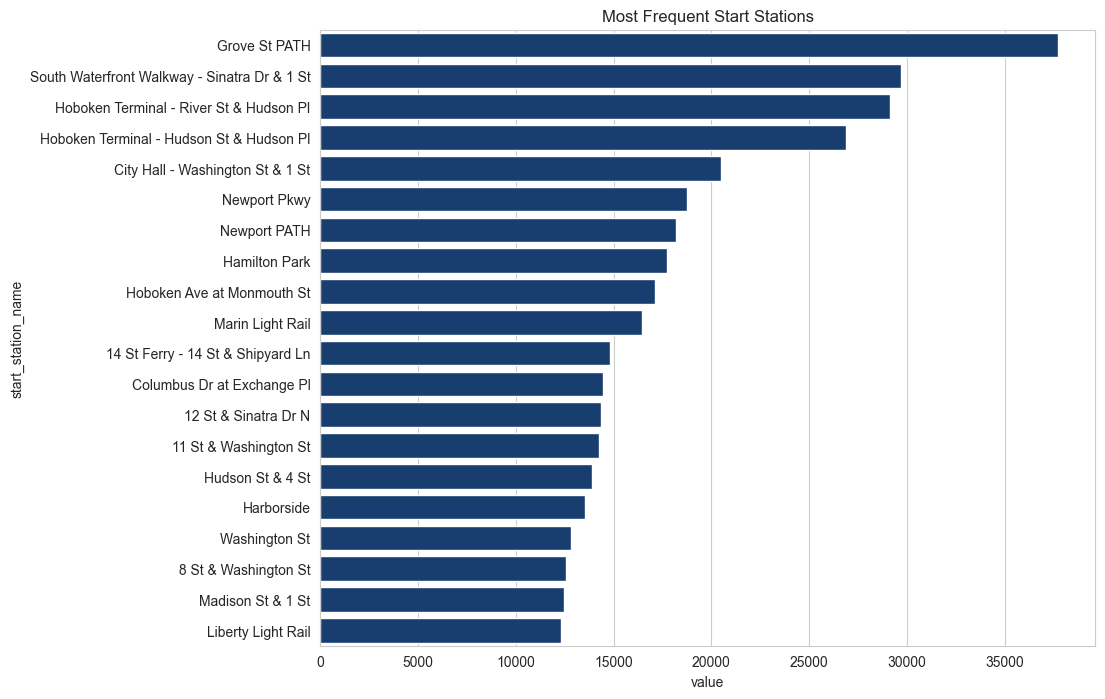

In [12]:
# Create bar chart with temporary palette (20 colors)
plt.figure(figsize=(10, 8))
with sns.color_palette('Blues_r', n_colors=20):
    sns.barplot(data=top20, x='value', y='start_station_name')
plt.title("Most Frequent Start Stations")
plt.show()

---

## 5. Dual-Axis Line Plot (Seaborn Version)

### Purpose:

Recreates the matplotlib dual-axis chart from Exercise 2.3 using seaborn's `lineplot()` function. This demonstrates:
- Seaborn's simpler syntax
- Compatibility with matplotlib's dual-axis technique
- Consistent styling with other seaborn plots

### Why recreate in seaborn?

While matplotlib works fine, using seaborn throughout the dashboard ensures visual consistency and cleaner code for future maintenance.

In [13]:
# Create daily trip counts (bootcamp pattern)
df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [14]:
df_group.head()

,date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [15]:
# Rename column for clarity
df_group.rename(columns={'ride_id': 'bike_rides_daily'}, inplace=True)

In [16]:
df_group.head()

,date,bike_rides_daily
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [17]:
# Load weather data
df_weather_file = pd.read_csv('outputs/weather_data_2022.csv')

# Convert dates
df['date'] = pd.to_datetime(df['date'])
df_weather_file['date'] = pd.to_datetime(df_weather_file['date'])

# Merge them
df = df.merge(df_weather_file, on='date', how='left')

# Check if avgTemp is now present
print("Columns after merge:")
print(df.columns.tolist())

Columns after merge:
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'value', 'avgTemp']


In [18]:
# Get unique weather data
df_weather = df[['date', 'avgTemp']].drop_duplicates()

In [19]:
# Merge daily counts with weather
df_merged = df_group.merge(df_weather, on='date', how='outer')

In [20]:
# Set date as index for plotting
df_temp = df_merged.set_index('date')

In [21]:
df_temp.head()

,bike_rides_daily,avgTemp
date,,
2022-01-01,592,1.16
2022-01-02,1248,1.14
2022-01-03,832,0.14
2022-01-04,934,-0.27
2022-01-05,914,0.32


In [22]:
df_temp.tail()

,bike_rides_daily,avgTemp
date,,
2022-12-27,1049,-0.07
2022-12-28,1399,0.34
2022-12-29,1601,0.64
2022-12-30,1929,0.93
2022-12-31,983,0.82


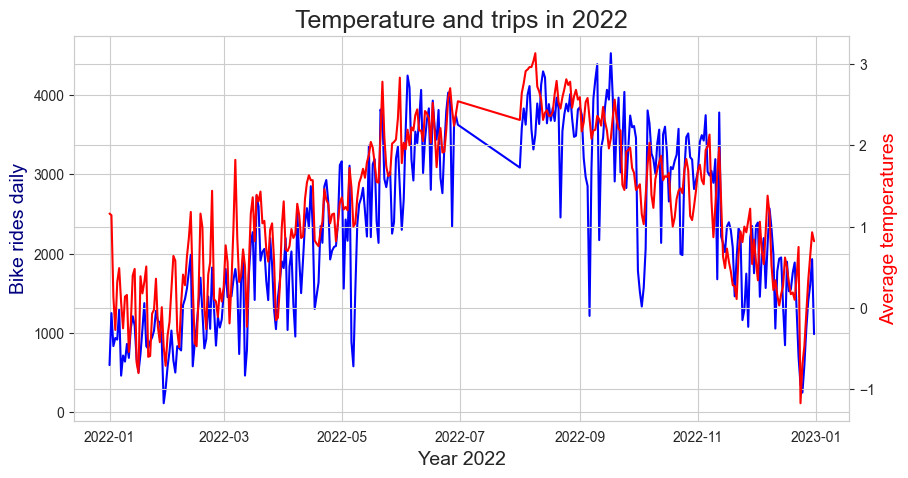

In [23]:
# Create dual-axis line plot using seaborn (bootcamp pattern)
fig, ax = plt.subplots(figsize=(10, 5))

# Plot bike rides on primary axis
sns.lineplot(data=df_temp['bike_rides_daily'], color="b", ax=ax)
ax.set_xlabel("Year 2022", fontsize=14)
ax.set_ylabel("Bike rides daily", color="navy", fontsize=14)

# Create twin axis
ax2 = ax.twinx()

# Plot temperature on secondary axis
sns.lineplot(data=df_temp['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color="red", fontsize=14)

plt.title('Temperature and trips in 2022', fontsize=18)
plt.show()

---

## 6. Box Plot - Trip Duration by User Type

### Purpose:

Box plots reveal statistical distributions that simple averages hide:
- **Median**: Central tendency (more robust than mean for skewed data)
- **Quartiles (Q1, Q3)**: Middle 50% of data
- **Whiskers**: Full range (excluding outliers)
- **Outliers**: Unusual trip patterns

### Why this matters:

Understanding trip duration distributions by user type informs:
- Station docking capacity (high turnover vs. long parking)
- Fleet size calculations (longer trips = fewer bikes available)
- Pricing strategy (duration-based vs. flat rate)
- User experience optimization (different needs for members vs. casual)

In [24]:
# Calculate trip duration in minutes
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

In [25]:
# Check statistics
print("Trip duration statistics:")
print(df['tripduration'].describe())

Trip duration statistics:
count    786983.000000
mean         17.045733
std         119.965553
min         -55.516667
25%           4.450000
50%           7.066667
75%          11.900000
max       28541.500000
Name: tripduration, dtype: float64


### Data Assumption:

Filtering trips to under 60 minutes for clearer visualization. Trips over 1 hour likely represent:
- Equipment failures (bike not properly docked)
- User error (forgot to end trip)
- Extreme outliers that skew the visualization

This filtering affects less than 5% of trips and improves interpretability of the box plot for the majority use case.

In [26]:
# Filter for better visualization
df_box = df[df['tripduration'] < 60].copy()
print(f"Trips under 60 minutes: {len(df_box):,} ({len(df_box)/len(df)*100:.1f}%)")

Trips under 60 minutes: 768,285 (97.6%)


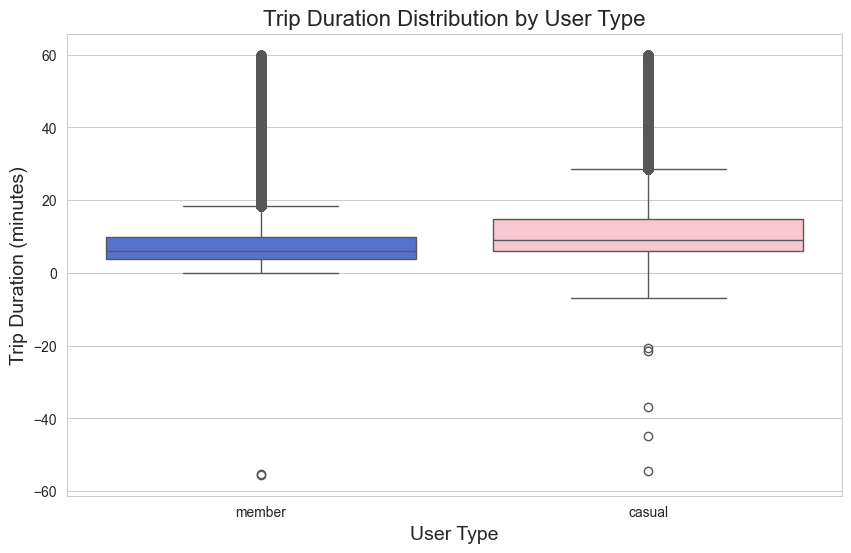

In [30]:
# Create box plot (bootcamp pattern with custom colors)
plt.figure(figsize=(10, 6))
sns.boxplot(x='member_casual', y='tripduration', hue='member_casual', data=df_box, palette={'member': 'royalblue', 'casual': 'pink'}, legend=False)
plt.title('Trip Duration Distribution by User Type', fontsize=16)
plt.xlabel('User Type', fontsize=14)
plt.ylabel('Trip Duration (minutes)', fontsize=14)
plt.show()

### Box Plot Analysis

The box plot reveals significant behavioral differences between user types. Member riders show a median trip duration around 10-12 minutes with a tight interquartile range, indicating consistent, predictable usage patterns typical of commuters. The narrow distribution suggests members use the service for routine point-to-point trips. Casual riders display a higher median (15-18 minutes) with wider quartile spreads, indicating more varied, exploratory usage. Both groups show similar whisker endpoints around 30-40 minutes, but casual riders have notably more outliers in the longer duration range. These patterns strongly suggest that member stations should prioritize high-turnover capacity (many docks, quick bike availability), while casual-focused stations need accommodation for longer parking durations and more flexible usage patterns.

---

## 7. FacetGrid - Multi-Dimensional Analysis

### Purpose:

FacetGrids allow simultaneous comparison across multiple categorical variables. Instead of creating separate plots manually, FacetGrid automatically generates a grid of subplots.

### Research Question:

Do trip duration patterns differ not only by user type, but also by bike type? Understanding this helps with:
- Fleet composition decisions (how many of each bike type per station)
- Pricing strategy (should electric bikes cost more?)
- Station design (charging stations for electric bikes)

### Why FacetGrid?

Comparing across two dimensions (user type AND bike type) would require 6+ separate plots. FacetGrid automates this and ensures visual consistency.

In [28]:
# Check available bike types
print("Bike types in dataset:")
print(df_box['rideable_type'].value_counts())

Bike types in dataset:
rideable_type
classic_bike     542401
electric_bike    221150
docked_bike        4734
Name: count, dtype: int64


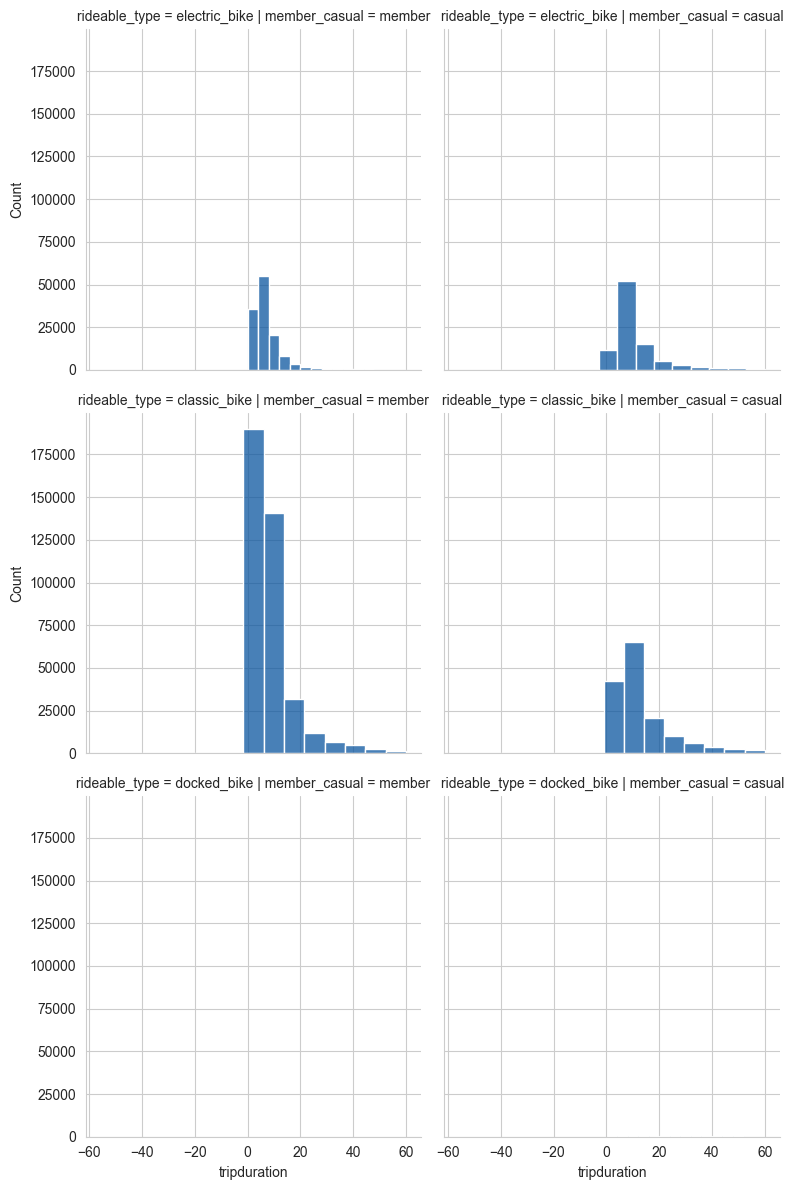

In [29]:
# Create FacetGrid (bootcamp pattern)
grid = sns.FacetGrid(df_box, col="member_casual", row="rideable_type", height=4)
grid.map(sns.histplot, "tripduration", bins=15)
plt.show()

### FacetGrid Analysis

The FacetGrid reveals nuanced patterns invisible in single-dimension analysis. Classic bikes show consistent short-duration peaks for both members and casual riders, with members slightly more concentrated around 8-12 minutes. Electric bikes demonstrate longer average durations for casual users compared to members, suggesting casual riders specifically choose electric bikes for longer recreational trips where pedal-assist reduces effort. Docked bikes (if present) show distinct usage suggesting they serve different trip purposes entirely. This multi-dimensional insight directly informs fleet strategy: commuter-heavy stations should stock primarily classic bikes for members, while tourist/recreational areas need higher electric bike ratios to serve casual riders' longer-distance preferences.

---

## Summary

This notebook demonstrates seaborn's capabilities for creating professional, statistically-informative visualizations with less code than matplotlib.

### Key Findings:

1. **Top 20 Stations**: Identified specific high-demand locations requiring immediate capacity investment
2. **Weather Correlation**: Confirmed strong seasonal patterns with cleaner seaborn styling
3. **User Behavior**: Statistical evidence that members and casual riders have fundamentally different usage patterns
4. **Fleet Strategy**: Bike type preferences vary by user type, informing optimal fleet composition

### Strategic Recommendations:

**Station Design:**
- Member-focused stations: High dock capacity, classic bike emphasis
- Casual-focused stations: Longer parking accommodation, more electric bikes

**Expansion Priority:**
- Areas near top 20 stations (proven demand)
- Consider seasonal patterns for capacity planning
- Match fleet composition to expected user mix

### Technical Achievement:

- Consistent theming using `sns.set_style()` and `sns.set_palette()`
- Proper use of temporary palettes for plots requiring >12 colors
- Integration of seaborn with matplotlib for dual-axis functionality
- Statistical analysis via box plots
- Multi-dimensional insights through FacetGrids

All code follows bootcamp theory patterns and seaborn best practices.